In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
ri = pd.read_csv('police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Part 1: Data Preparation

In [20]:
# locate and count missing values
display(ri.isnull().any())
ri.isnull().sum()

state                 False
stop_date             False
stop_time             False
county_name            True
driver_gender          True
driver_race            True
violation_raw          True
violation              True
search_conducted      False
search_type            True
stop_outcome           True
is_arrested            True
stop_duration          True
drugs_related_stop    False
district              False
dtype: bool

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [21]:
# shape
ri.shape

(91741, 15)

<b>Dropping column</b>

The county_name column contains as many missing values as there are rows, meaning that it only contains missing values

In [22]:
# drop country_name column : inplace = True drop from column axis
ri.drop('county_name', axis='columns', inplace=True)

In [23]:
ri.shape

(91741, 14)

In [24]:
# drop the state column as data is of one state (Rhode Island)
ri.drop('state', axis='columns', inplace=True)

ri.shape

(91741, 13)

<b>Dropping Row</b>

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

In [25]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
display(ri.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


(86536, 13)

Excellent! We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

<b> Fixing data types</b>

Use the .astype() method

In [26]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


<b>Combining object columns : datetime format </b>

* the date and time of each traffic stop are stored in separate columns : object
* combine these two columns into a single column and then convert it to pandas' datetime format
* datetime columns provide date-based attributes that will make our analysis easier

In [27]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

Currently, the date and time of each traffic stop are stored in separate object columns: stop_date and stop_time.

In [28]:
# date formating change
# df.date.str.replace('/','-')

#combine date with time separated by space
#df.date.str.cat(df.time, sep=' ')

#convert to datetime formate

In [29]:
#Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


<b>Setting the index</b>

By replacing the default index with a DatetimeIndex, you'll make it easier to analyze the dataset by date and time

In [30]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
display(ri.index)

# Examine the columns
display(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

## Part 2: Data Exploration

### Relationship between gender and policing

In [31]:
ri.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [32]:
ri.stop_outcome.value_counts().sum()

86536

In [33]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [34]:
ri.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [76]:
white = ri[ri.driver_race == 'White']
asian = ri[ri.driver_race == 'Asian']

In [77]:
# comparing stop outcomes for two groups
display(white.stop_outcome.value_counts(normalize=True).to_frame())
display(asian.stop_outcome.value_counts(normalize=True))

,stop_outcome
Citation,0.902263
Warning,0.057508
Arrest Driver,0.024018
No Action,0.007031
N/D,0.006433
Arrest Passenger,0.002748


Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

<AxesSubplot:>

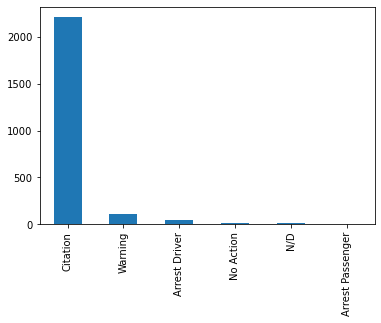

In [75]:
asian.stop_outcome.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='stop_outcome', ylabel='count'>

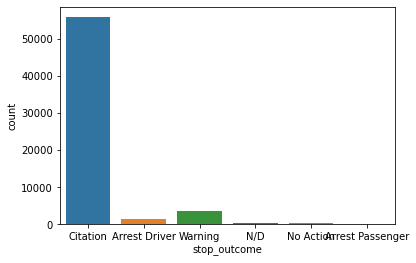

In [69]:
sns.countplot(x=white['stop_outcome'])

### Examining traffic violations

Before comparing the violations being committed by each gender, examine the violations committed by all drivers to get a baseline understanding of the data.

In [79]:
# Express Counts - unique values in 'violation' as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


Interesting! More than half of all violations are for speeding, followed by other moving violations and equipment violations.

### Comparing violations by gender

In [81]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
display(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
display(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

In [83]:
female_and_arrested = ri[(ri.driver_gender == 'F') & 
                         (ri.is_arrested==True)]
female_and_arrested.shape

(669, 13)

In [84]:
female_or_arrested = ri[(ri.driver_gender == 'F') | 
                         (ri.is_arrested==True)]
female_or_arrested.shape

(26183, 13)

In [85]:
female.shape

(23774, 13)

In [89]:
female_speeding = ri[(ri.driver_gender == 'F') & 
                     (ri.violation == 'Speeding')]
female_speeding.shape

(15646, 13)

### Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Let's check it.

In [90]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
display(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
display(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

In [91]:
# Compute the stop outcomes for female drivers
display(female_and_speeding.stop_outcome.value_counts())

# Compute the stop outcomes for male drivers
display(male_and_speeding.stop_outcome.value_counts())

Citation            14898
Warning               627
Arrest Driver          90
N/D                    15
Arrest Passenger       10
No Action               6
Name: stop_outcome, dtype: int64

Citation            30961
Warning              1186
Arrest Driver         521
Arrest Passenger       42
No Action              35
N/D                    32
Name: stop_outcome, dtype: int64

### The arrest rate for every combination of district and gender

In [92]:
ri.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [93]:
ri.is_arrested.mean()

0.0355690117407784

In [98]:
display(ri.district.nunique(), ri.district.unique())

6

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [100]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024349083895853423

In [99]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [106]:
district_arrested = ri.groupby(['district','driver_gender']).is_arrested.mean().to_frame()

In [105]:
ri.groupby(['driver_gender','district']).is_arrested.mean().to_frame()

is_arrested
driver_gender district             
F             Zone K1      0.019169
              Zone K2      0.022196
              Zone K3      0.025156
              Zone X1      0.019646
              Zone X3      0.027188
              Zone X4      0.042149
M             Zone K1      0.026588
              Zone K2      0.034285
              Zone K3      0.034961
              Zone X1      0.024563
              Zone X3      0.038166
              Zone X4      0.049956

### Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. Let's calculate the percentage of all stops in the ri DataFrame that result in a vehicle search, also known as the search rate.

In [109]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

bool


In [111]:
# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


Great! It looks like the search rate is about 3.8%.

### Comparing search rates by gender

In [112]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

0.019180617481282074


In [113]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

0.04542557598546892


In [114]:
# Calculate the search rate for both groups simultaneously
display(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

Wow! Male drivers are searched more than twice as often as female drivers.

Why might this be?

### Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

1. Lets's hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

In [115]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [117]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


Great work! For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.